In [1]:
# importing different different libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('50_Startups.csv')

Insights :

-  .read_csv is a function of pandas library.

-  we use .read_csv function to read the csv files.

-  Import csv file and convert it to a DataFrame object

In [3]:
df.head()  # use .head to see first 5 element of DataFrame

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Insights :

-  .head() function is use to see first 5 elements of the data frame 

-  we can get just some idea about data by using .head() function like how many colums we have and how data is string or numeric etc.

In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Insights :

-  To see Column name we use .columns function

In [5]:
df.shape # using .shape for knowing the rows n colloumns

(50, 5)

Insights :

-  .shape function use to see the shape of the data frame like how many rows and columns its contain 

-  its also shows the data is one dimensional or two dimensional


In [6]:
df.info() # .info() shows the columns names how any rows are non-null and their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Insights :

-  .info() function is use to see data type of the columns.

-  to see how many rows contains value means not null 

In [7]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

Insights :

-  .value_counts() use to see our colums contain catogorical data or not

-  It will give the counts of data that how many times the certain data comes or occurs.

-  Now in the Current scenario State column contains catogorical data, its contain string/object data however our model is not accept the string/object.

-  To convert the data in numeric format we use encoding.(One Hot Coding)

In [8]:
df = pd.get_dummies(df,columns=['State'])

Insights :

-  .get dummies() is use to convert the catogorical object data into numeric format (0 and 1).

-  it will create dummies of the data on the basis of catogorical data

-  to convert catogorical data using .get_dummies is called as One Hot coding.

In [9]:
df.info() # new colums are added due to get_dummies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [10]:
df.isnull().sum()

R&D Spend           0
Administration      0
Marketing Spend     0
Profit              0
State_California    0
State_Florida       0
State_New York      0
dtype: int64

Insights :

-  .isnull() function to see the null data present in the data frame

-  we use .sum() function after .isnull() for taking sum of the null values (how many rows contains null values)

In [11]:
df.describe() # .describe use to calculate the some statistical data 

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


Insights :

-  .describe() function is statistical funtion

-  To see some mathematical operation on data frame. it is perfom mathematical operation only on numerical data like the columns which contains numeric data. 


# Visualization of Data Frame 

In [12]:
df.corr()  #Corelation Matrix

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<AxesSubplot:>

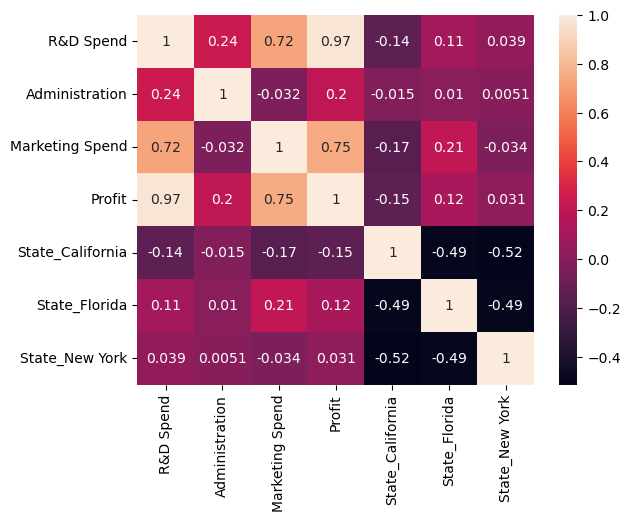

In [13]:
sns.heatmap(df.corr(),annot=True)

Insights :

-  .corr() means corelaton how data is corelated to each other

-  we have to see how our data is corelated and remove the highly corelated data.

-  With the help sns.heat(corr) we visualize the corelation between the features

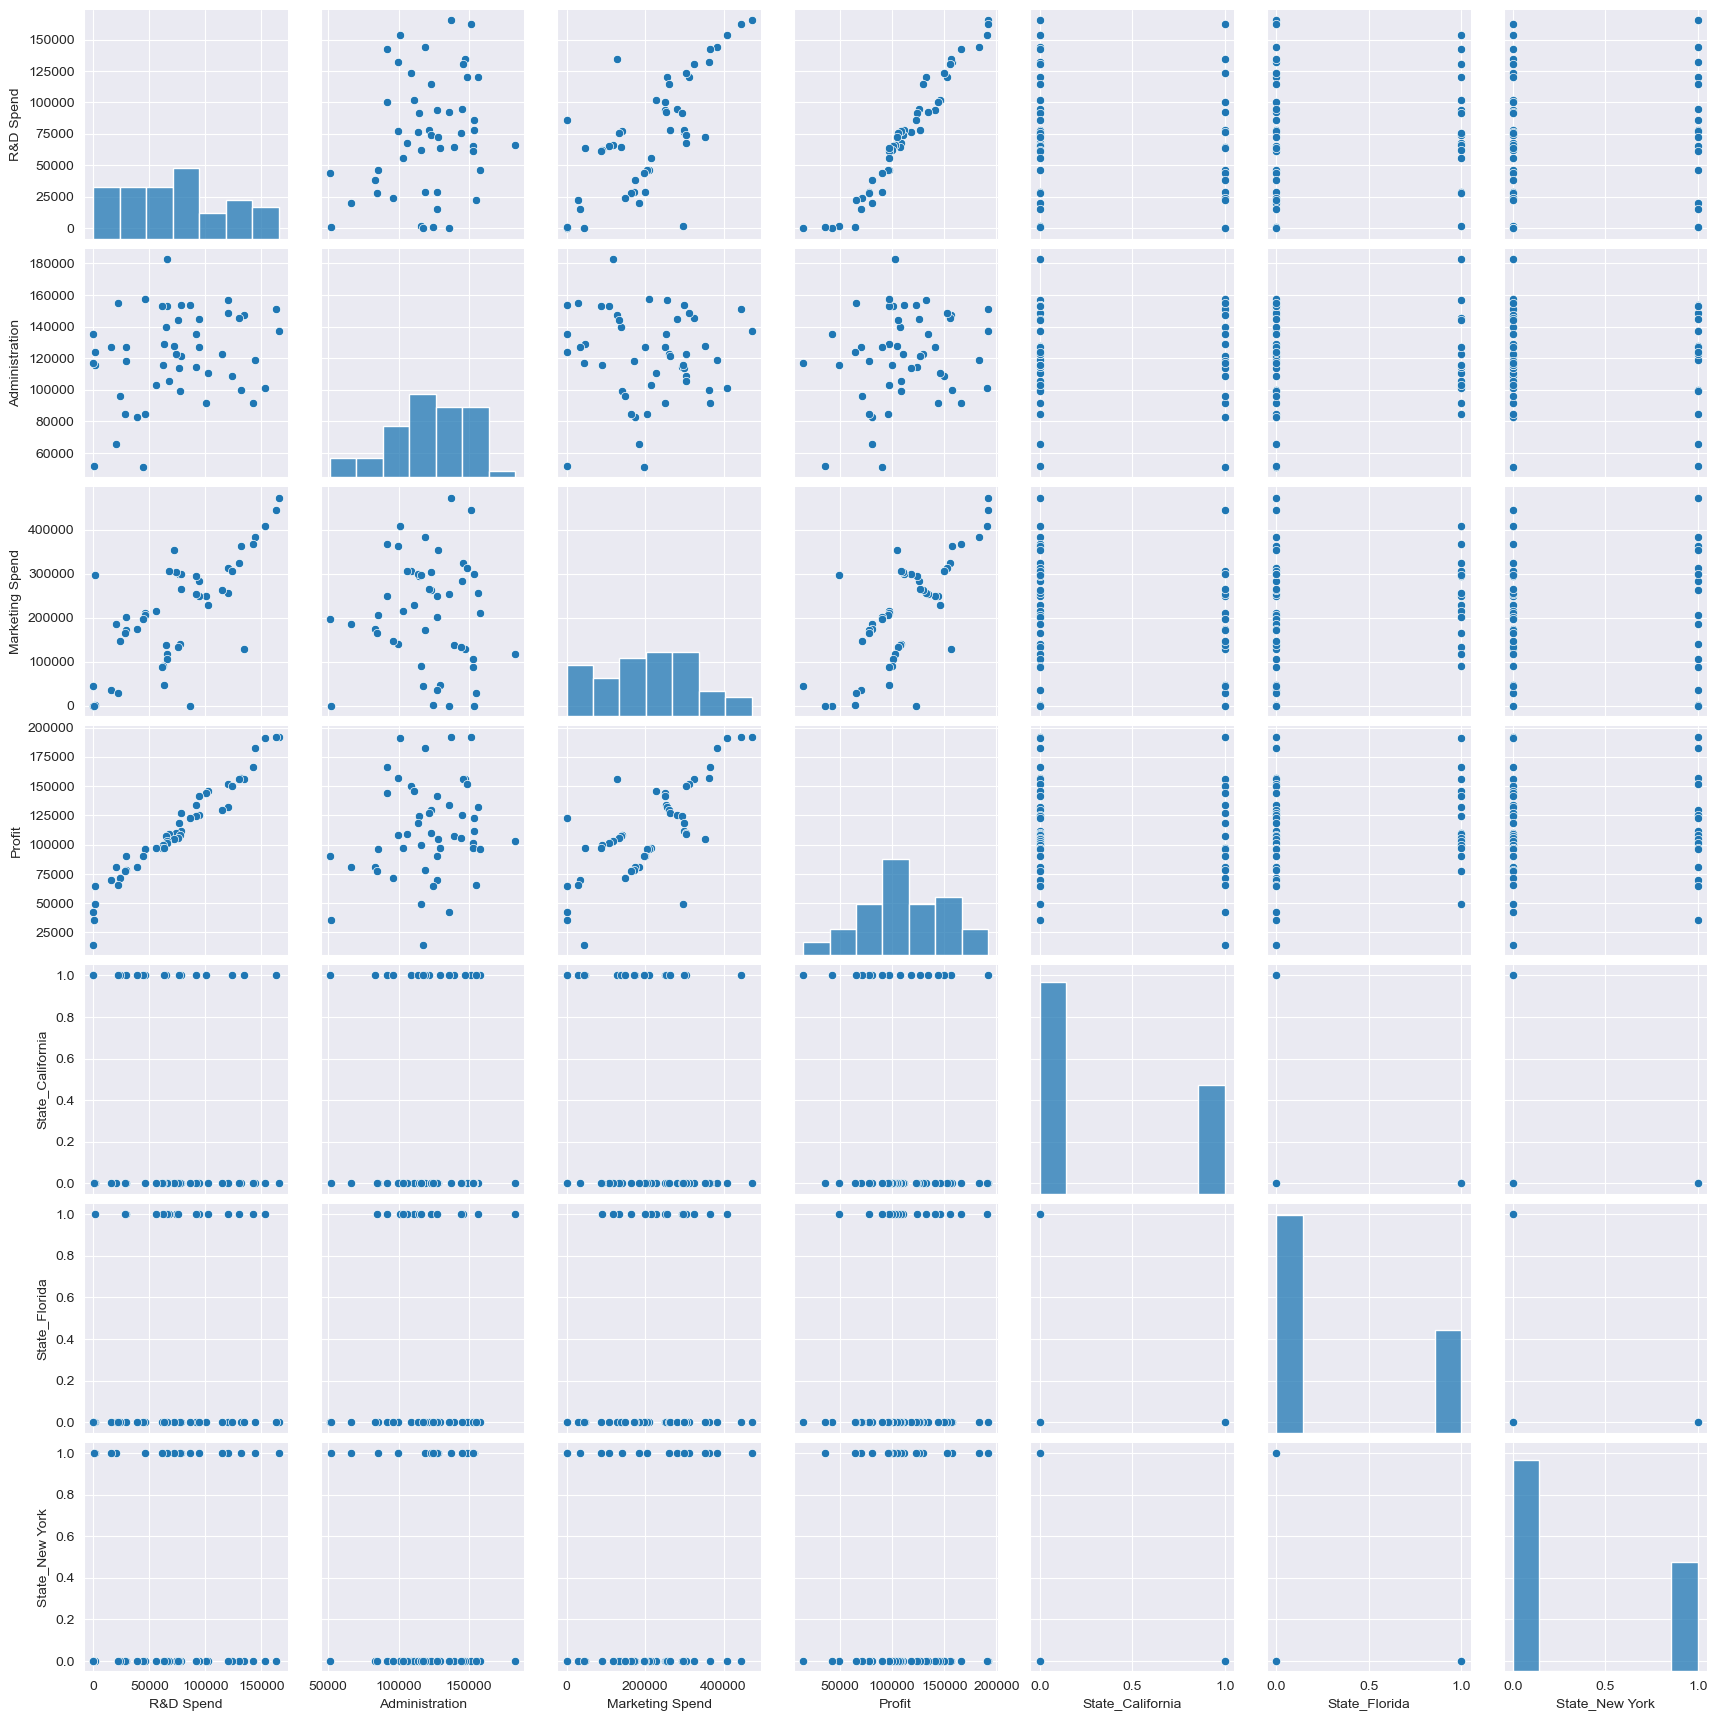

In [14]:
#Format the plot background and scatter plots for all the variables
#cheking is corelation between features by pairplot
sns.set_style(style='darkgrid')
sns.pairplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x28d19e21dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x28d19e2f3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28d19e21af0>],
 'medians': [<matplotlib.lines.Line2D at 0x28d19e2f940>],
 'fliers': [<matplotlib.lines.Line2D at 0x28d19e2fc10>],
 'means': []}

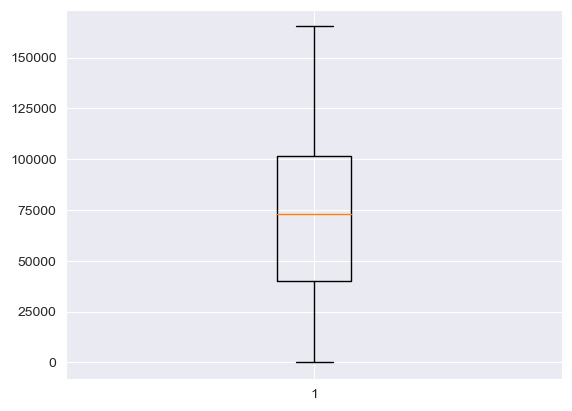

In [15]:
plt.boxplot(df['R&D Spend']) # for detecting outlier use boxplot

Insights :

1)To see outlier we use boxplot

2) In current Scenario R&D Spend does not contains any outliers. our data is perfect

{'whiskers': [<matplotlib.lines.Line2D at 0x28d1a9d4d90>,
 'caps': [<matplotlib.lines.Line2D at 0x28d1a9e1370>,
 'boxes': [<matplotlib.lines.Line2D at 0x28d1a9c4940>],
 'medians': [<matplotlib.lines.Line2D at 0x28d1a9e1910>],
 'fliers': [<matplotlib.lines.Line2D at 0x28d1a9e1be0>],
 'means': []}

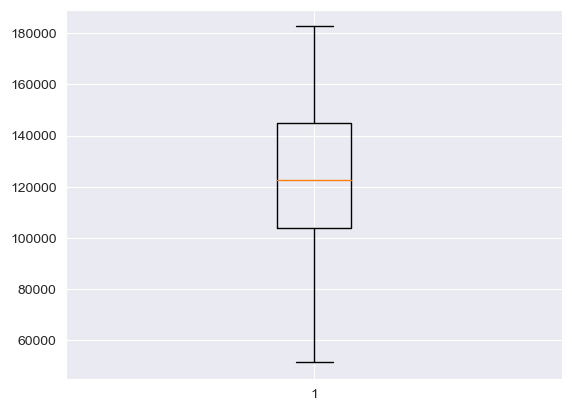

In [16]:
plt.boxplot(df['Administration']) # for detecting outlier use boxplot

Insights :

1) In current Scenario Administration does not contain outliers, our data is perfect.

{'whiskers': [<matplotlib.lines.Line2D at 0x28d1aa00340>,
 'caps': [<matplotlib.lines.Line2D at 0x28d1aa008e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28d1ab65e80>],
 'medians': [<matplotlib.lines.Line2D at 0x28d1aa00e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x28d1aa0c190>],
 'means': []}

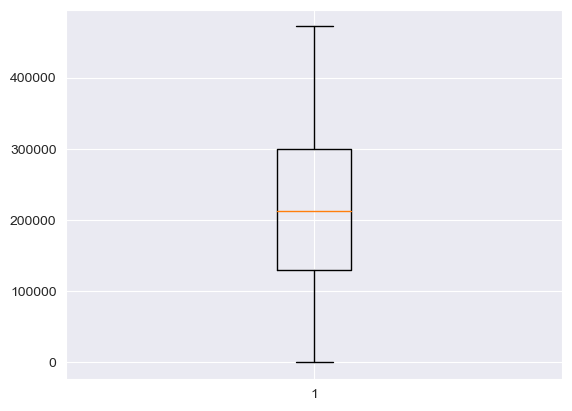

In [17]:
plt.boxplot(df['Marketing Spend']) # for detecting outlier use boxplot

Insights :

-  on the basis above boxplot Marketing Spend column does not contain outliers, its seens to be our data is perfect.

{'whiskers': [<matplotlib.lines.Line2D at 0x28d1aa51e50>,
 'caps': [<matplotlib.lines.Line2D at 0x28d1aa61430>,
 'boxes': [<matplotlib.lines.Line2D at 0x28d1aa51ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x28d1aa619d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28d1aa61ca0>],
 'means': []}

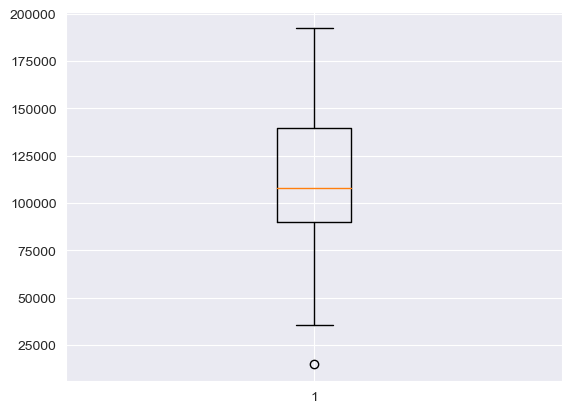

In [18]:
plt.boxplot(df['Profit'])

Insights :

-  Above boxplot contain one outlier which means the one data which will create a bad impact in our model or reduce the score of model for that we have to remove that outlier

In [19]:
df[df.Profit <25000]

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
49,0.0,116983.8,45173.06,14681.4,1,0,0


Insights :

-  Filtering out the outlier data to remove. In our case the outlier contain profit less than 25000. This information we can clearly see with the help of boxplot 

In [20]:
df = df.drop(49)

Insights :

-  .drop use to drop/remove the row from data 

-  To remove the column from data we have to use one parameter i.e. axis = 1 

{'whiskers': [<matplotlib.lines.Line2D at 0x28d1aac4430>,
 'caps': [<matplotlib.lines.Line2D at 0x28d1aac49d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28d1aac4160>],
 'medians': [<matplotlib.lines.Line2D at 0x28d1aac4fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28d1aad12b0>],
 'means': []}

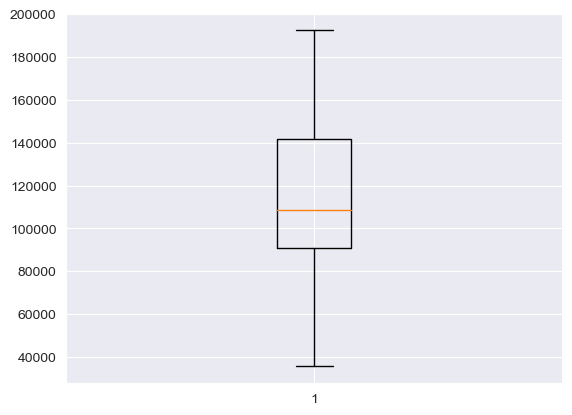

In [21]:
plt.boxplot(df.Profit)

Insight :

-  Again ploting boxplot of Profit to see we have remove correct outlier andany other outlier is present or not 

In [22]:
df.shape

(49, 7)

Insights :

-  .shape use to see shape of data earlier our data frame shape is (50,5) now it is (49,7) 

-  1 row is less because we remove one row which contains outlier and in columns we have 7 which is increase by 2 because we have created a dummies of the catogorical data.

In [23]:
import scipy.stats as stat
import pylab

Insight :

-  Here we are using stats library of scipy for calculation purpose and pylab for plots.

In [24]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

Insight :

-  Creating a function for ploting a data frame againts feature to see the linearity.
-  We use probplot here to to calculate best fit line and plot according to that.

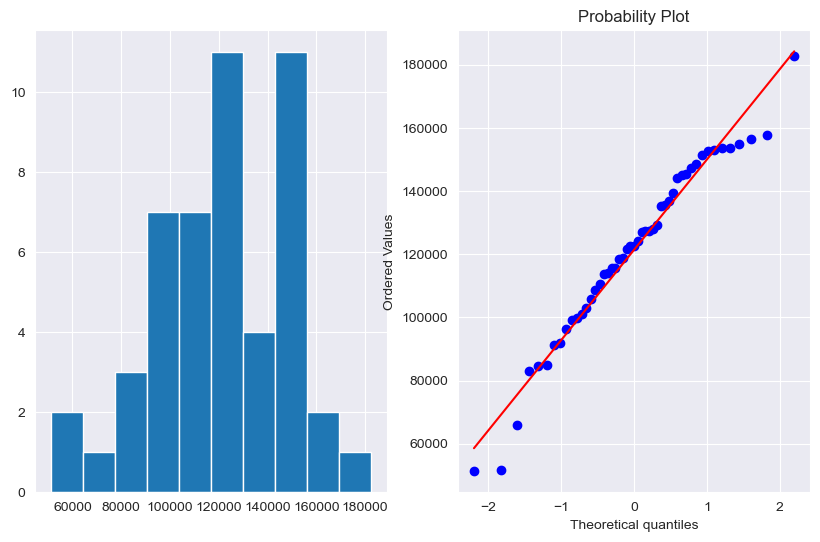

In [25]:
plot_data(df,'Administration')

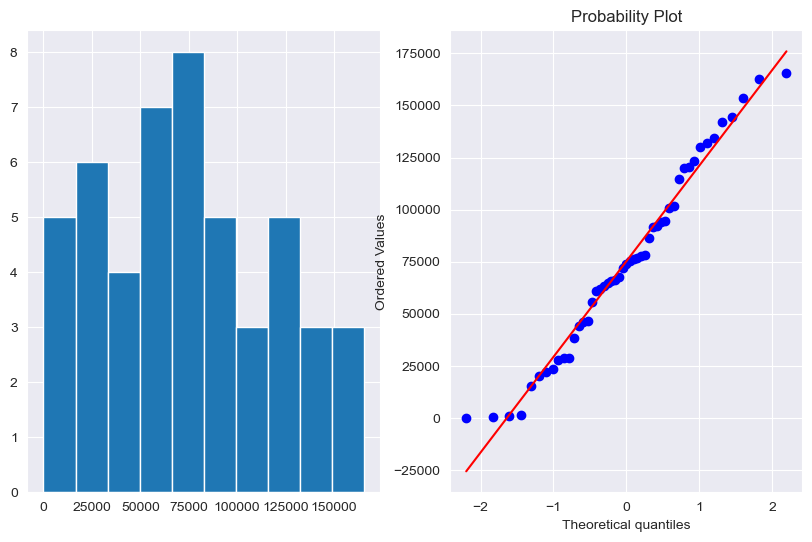

In [26]:
plot_data(df,'R&D Spend')

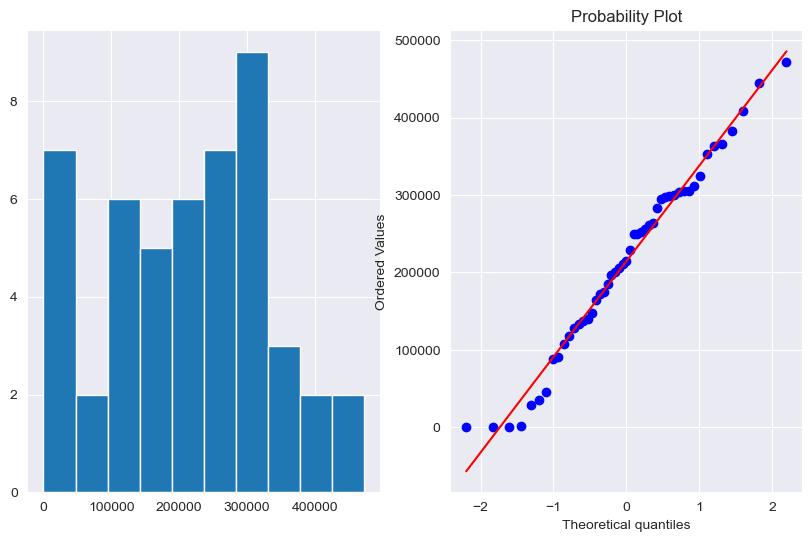

In [27]:
plot_data(df,'Marketing Spend')

Insight :

-  Ploting all the features against data frame to see the best fit line.

# Assigning indedpendent & dependent Variables

In [28]:
x = df.drop(['Profit'],axis=1) #assigning input (x) 

Insight :

-  X is an independent variable and we are assigning value to it.
-  we drop Profit column because it our output variable 

In [29]:
y = df.Profit

Insight:

-  Y is a dependent variable and we are assigning value to it.

In [30]:
# Spliting data into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=3,test_size=0.30)

Insight :

-  With the help of train_test split we divided our dataframe into two parts (train and test)
-  we divided our data into train and test data into 70-30 size means our train data size is 70% of the whole data and test data size is 30% of the whole data
-  we divided our data in two data set because we perform all EDA, visualization, taking some insights from train data, and taken sll insights will apply on test data to predict and to check how good our model is work

In [31]:
# Model Building
model = LinearRegression()

Insight :

-  Creating model for the prediction
-  here we are using Linear Regression model because our output value is contineous value.

In [32]:
model.fit(x_train,y_train)

LinearRegression()

Insight :

-  .fit is use to fit data in model 
-  Here we are provide training data to model for fiting purpose

In [33]:
model.score(x_train,y_train)

0.959575709341753

In [34]:
model.score(x_test,y_test)

0.9572876338032976

Insight :

-  .score use to check the score of the model, how much our model is able to give right answer
-  Here our model give score of 95.72% which is good but still we will try to improve it.

In [35]:
y_pred=model.predict(x_test)
residual = y_test - y_pred

In [36]:
model.intercept_

56613.63978284065

In [37]:
model.coef_

array([ 7.93470558e-01, -5.54772400e-02,  2.29743714e-02,  3.19496837e+03,
       -1.89848353e+03, -1.29648485e+03])

# Checking Assumptions of Linear Regression

-  Linear Relationship

In [38]:
x.head(1)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.2,136897.8,471784.1,0,0,1


In [39]:
y.head(1)

0    192261.83
Name: Profit, dtype: float64

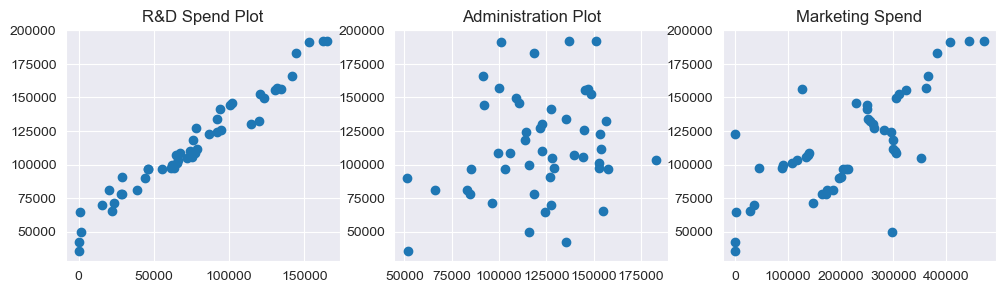

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize = (12,3))

ax1.scatter(df['R&D Spend'],df['Profit'])
ax1.set_title('R&D Spend Plot')

ax2.scatter(df['Administration'],df['Profit'])
ax2.set_title('Administration Plot')

ax3.scatter(df['Marketing Spend'],df['Profit'])
ax3.set_title('Marketing Spend')

plt.show()

Insights :

-  With the help of above scatter plot we can clearly see that there is linear relationship is present between features and target variables

-  Our first assumption of Linear regression is statisfied

-  Multicollinearity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
VIF = []

for i in range(x_train.shape[1]):
    VIF.append(variance_inflation_factor(x_train, i))

In [43]:
pd.DataFrame({'VIF': VIF}, index=df.columns[0:6])

,VIF
R&D Spend,3.398986
Administration,1.290538
Marketing Spend,2.885002
Profit,7.979788
State_California,7.222956
State_Florida,12.008820


-  Multicollinearity states that there should not be any corelation between the independent variable.
-  We can check multicollinearity with the help of VIF score
-  Our VIF score is less than 6 except catogrical columns means their is no multicollinerity.
-  Our 2nd Assumption of Linear Regression is satisfied.

-  Normality of Residual 

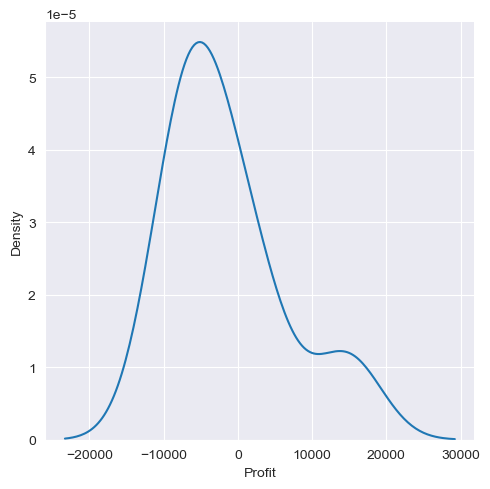

In [44]:
sns.displot(residual,kind='kde')

-  We can clearly see that our data is normally distributed with one small peak hike.
-  Our 3rd Assumption of Linear Regression is satisfied.

Homoscedasticity

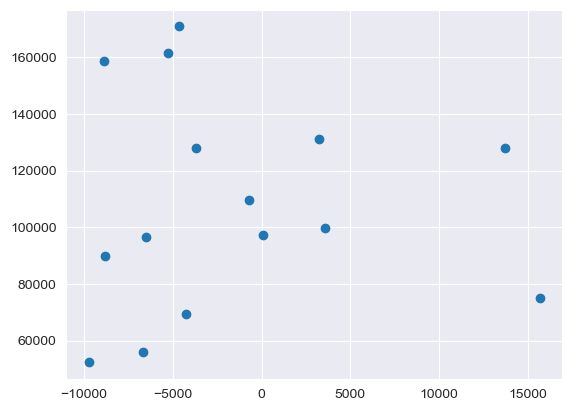

In [45]:
plt.scatter(residual, y_pred)

-  There is no such pattern seen in the plot. on that basis we can say that our 4th Assumption of Linear Regression is satisfied.

Autocorrelation of Residuals

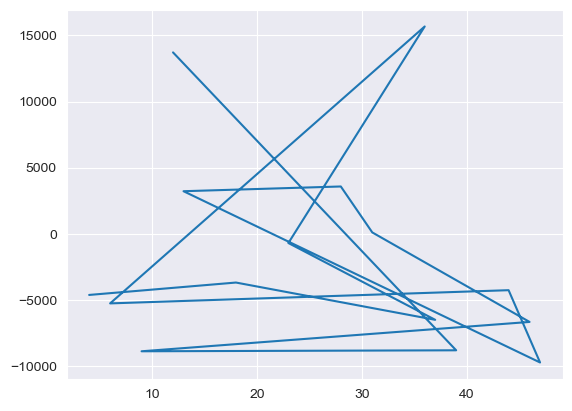

In [46]:
plt.plot(residual)

-  There is no such pattern/relation seen in the plot. on that basis we can say that our 5th Assumption of Linear Regression is satisfied.

Tranformation

-  Standard Scaler

In [47]:
# Standarisation - we use the Standarisation from sklearn library
from sklearn.preprocessing import StandardScaler

In [48]:
# Standarisation - we use the Standarisation from sklearn library
from sklearn.preprocessing import StandardScalerscaler = StandardScaler()
# fit vs fit_transform
x_train_scaled = scaler.fit_transform(x_train)

In [49]:
x_train_scaled

array([[-0.31755053,  0.69902669, -0.66014672,  1.66666667, -0.6       ,
        -0.94280904],
       [-0.01749771,  0.01871991,  0.34958972,  1.66666667, -0.6       ,
        -0.94280904],
       [ 0.80320577,  0.05733903,  0.32905814, -0.6       , -0.6       ,
         1.06066017],
       [-0.37757346, -0.20695278, -1.03430453, -0.6       ,  1.66666667,
        -0.94280904],
       [ 0.49184062, -1.11061312,  0.23293142,  1.66666667, -0.6       ,
        -0.94280904],
       [ 1.15779427,  0.92548102,  0.8252077 , -0.6       ,  1.66666667,
        -0.94280904],
       [-1.12476418, -0.09689611, -0.38184919,  1.66666667, -0.6       ,
        -0.94280904],
       [-0.15024508,  0.25616562,  1.05935607, -0.6       , -0.6       ,
         1.06066017],
       [-0.72752891,  1.38634848, -0.07823343,  1.66666667, -0.6       ,
        -0.94280904],
       [-1.7486364 ,  0.11554297, -1.74718327, -0.6       , -0.6       ,
         1.06066017],
       [ 1.19328275, -0.80659395,  1.13667455, -0.

In [50]:
x_test_scaled = scaler.transform(x_test)

In [51]:
x_test_scaled

array([[ 0.33880186,  0.23554797,  0.23368954, -0.6       ,  1.66666667,
        -0.94280904],
       [-0.90438033, -1.4443526 , -0.36424336,  1.66666667, -0.6       ,
        -0.94280904],
       [ 1.00127044, -0.470735  ,  0.67424622,  1.66666667, -0.6       ,
        -0.94280904],
       [-1.74155049, -0.20032499,  0.6113918 , -0.6       ,  1.66666667,
        -0.94280904],
       [-0.39686231,  1.1972103 , -1.05757793, -0.6       , -0.6       ,
         1.06066017],
       [-0.28637704,  2.33172265, -0.8184534 , -0.6       ,  1.66666667,
        -0.94280904],
       [ 0.29673638,  0.54527273,  0.2562637 ,  1.66666667, -0.6       ,
        -0.94280904],
       [-1.77112013,  0.54269064, -1.76239465,  1.66666667, -0.6       ,
        -0.94280904],
       [-1.27259646,  1.27693553, -1.53601532,  1.66666667, -0.6       ,
        -0.94280904],
       [ 1.25484164,  0.98870932, -0.74200521,  1.66666667, -0.6       ,
        -0.94280904],
       [-1.12680007,  0.22553903, -0.15549837, -0.

In [52]:
# Model building
model1 = LinearRegression()

In [53]:
# here we use .fit for traing 
model1.fit(x_train_scaled,y_train)

LinearRegression()

In [54]:
# here we use .predict for testing
model1.predict(x_test_scaled)

array([127869.79915557,  89820.53219333, 158648.74482869,  56159.78929962,
        97382.34981524,  99706.80175537, 131089.78661158,  52295.49641893,
        69468.74689576, 161390.03895406,  75031.04030095, 109435.32523836,
        96458.39598027, 127956.84746903, 170815.47274376])

In [55]:
model1.score(x_train_scaled,y_train)

0.959575709341753

In [56]:
model1.score(x_test_scaled,y_test)

0.9572876338007194

-  Min Max Scaler

In [57]:
#Spliting data into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=3,test_size=0.30)

In [58]:
#Min max scaler 
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x_train_minmax = pd.DataFrame(min_max.fit_transform(x_train))
x_train_minmax.head()

,0,1,2,3,4,5
0,0.389077,0.828781,0.292427,1.0,0.0,0.0
1,0.470071,0.659310,0.560312,1.0,0.0,0.0
2,0.691606,0.668930,0.554864,0.0,0.0,1.0
3,0.372875,0.603093,0.193163,0.0,1.0,0.0
4,0.607558,0.377982,0.529362,1.0,0.0,0.0


In [59]:
x_train_minmax.shape

(34, 6)

In [60]:
x_test_minmax = pd.DataFrame(min_max.transform(x_test))

In [61]:
x_test_minmax.head()

,0,1,2,3,4,5
0,0.566248,0.713324,0.529563,0.0,1.0,0.0
1,0.230672,0.294844,0.370931,1.0,0.0,0.0
2,0.745070,0.537382,0.646443,1.0,0.0,0.0
3,0.004693,0.604744,0.629768,0.0,1.0,0.0
4,0.367668,0.952884,0.186989,0.0,0.0,1.0


In [62]:
x_test_minmax.shape

(15, 6)

In [63]:
model2 = LinearRegression()

In [64]:
model2.fit(x_train_minmax,y_train)

LinearRegression()

In [65]:
model2.score(x_train_minmax,y_train)

0.959575709341753

In [66]:
model2.score(x_test_minmax,y_test)

0.9572876338007192

-  Robust Scaler

In [67]:
#Spliting data into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=3,test_size=0.30)

In [68]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_robust_scaler = pd.DataFrame(scaler.fit_transform(x_train))
x_train_robust_scaler.head()

,0,1,2,3,4,5
0,-0.177521,0.389956,-0.512400,1.333333,0.000000,0.0
1,0.035447,-0.025504,0.259134,1.333333,0.000000,0.0
2,0.617957,-0.001919,0.243446,0.000000,0.000000,1.0
3,-0.220123,-0.163321,-0.798292,0.000000,1.333333,0.0
4,0.396959,-0.715182,0.169996,1.333333,0.000000,0.0


In [69]:
x_test_robust_scaler = pd.DataFrame(scaler.transform(x_test))
x_test_robust_scaler.head()

,0,1,2,3,4,5
0,0.288337,0.106912,0.170575,0.000000,1.333333,0.0
1,-0.594034,-0.918995,-0.286302,1.333333,0.000000,0.0
2,0.758537,-0.324411,0.507202,1.333333,0.000000,0.0
3,-1.188232,-0.159274,0.459175,0.000000,1.333333,0.0
4,-0.233814,0.694194,-0.816075,0.000000,0.000000,1.0


In [70]:
model3 = LinearRegression()

In [71]:
model3.fit(x_train_robust_scaler,y_train)

LinearRegression()

In [72]:
model3.score(x_train_robust_scaler,y_train)

0.959575709341753

In [73]:
model3.score(x_test_robust_scaler,y_test)

0.9572876338007194

-  Square root Transformation

In [74]:
#Spliting data into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=3,test_size=0.30)

In [75]:
x_train_sr = x_train**(1/2)
x_test_sr = x_test**(1/2)

In [76]:
model4 = LinearRegression()

In [77]:
model4.fit(x_train_sr,y_train)

LinearRegression()

In [78]:
model4.score(x_train_sr,y_train)

0.889093264383878

In [79]:
model4.score(x_test_sr,y_test) 

0.8712409416867075

-  Square Transformation

In [80]:
#square transformation
x_train_s=x_train**2
x_test_s=x_test**2

In [81]:
#apply this transforemed date in model
model5 = LinearRegression()
model5.fit(x_train_s,y_train)

LinearRegression()

In [82]:
#score of model on train data
model5.score(x_train_s,y_train)

0.915084688729739

In [83]:
#score of model on train data
model5.score(x_test_s,y_test)

0.7978748092381714

In [84]:
#Creating Dataframe of all model scores
data = pd.DataFrame({'Model No.':['Model','Model1','Model2','Model3','Model4','Model5'],
                     'Train_Score':[model.score(x_train,y_train),model1.score(x_train_scaled,y_train),model2.score(x_train_minmax,y_train),model3.score(x_train_robust_scaler,y_train),model4.score(x_train_sr,y_train),model5.score(x_train_s,y_train)],
                     'Test_Score':[model.score(x_test,y_test),model1.score(x_test_scaled,y_test),model2.score(x_test_minmax,y_test),model3.score(x_test_robust_scaler,y_test),model4.score(x_test_sr,y_test),model5.score(x_test_s,y_test)]})

In [85]:
data  # R^2 value for each prepared model

,Model No.,Train_Score,Test_Score
0,Model,0.959576,0.957288
1,Model1,0.959576,0.957288
2,Model2,0.959576,0.957288
3,Model3,0.959576,0.957288
4,Model4,0.889093,0.871241
5,Model5,0.915085,0.797875


Insight :

-  Here our first 4 models gives us a better score.